In [3]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import time
#style.use('ggplot')

# Import and Initialize Sentiment Analyzer
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
#from config import (consumer_key, 
#                    consumer_secret, 
#                    access_token, 
#                    access_token_secret)
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
#analyzer = SentimentIntensityAnalyzer()

In [5]:
# Setup Tweepy API Authentication
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
movie_df = pd.read_csv("../data/sample_movies_with_twitter.csv", nrows=6)

movie_df

,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5
0,2,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386","$61,236,534","4,386",7/27/2018,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN
1,3,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188","$10,411,189","3,188",7/27/2018,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN
2,5,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514","$34,952,180","3,317",7/20/2018,-,MammaMia2,NaN,NaN,NaN,NaN
3,6,28,The Equalizer 2,Sony,"$54,241,345","3,388","$36,011,640","3,388",7/20/2018,-,TheEqualizer2,NaN,NaN,NaN,NaN
4,7,76,Unfriended: Dark Web,BH Tilt,"$6,375,430","1,547","$3,653,035","1,546",7/20/2018,-,UnfriendedMovie,UnfriendedDarkWeb,NaN,NaN,NaN
5,8,12,Hotel Transylvania 3: Summer Vacation,Sony,"$110,628,501","4,267","$44,076,225","4,267",7/13/2018,-,HotelT3,NaN,NaN,NaN,NaN


In [25]:
sentiment_df = pd.read_csv("../data/MovieTweetsSentiment.csv")

sentiment_df.head()

,MovieTitle,TweetID,TweetText,TweetCreated,CompoundScore,positive_list,negative_list,neutral_list
0,Mission: Impossible - Fallout,1026263074699849728,RT @ShakenNotNerd: Episode 78 - Mission Imposs...,Sun Aug 05 22:46:13 +0000 2018,0.0000,0.000,0.000,1.000
1,Mission: Impossible - Fallout,1026263074699849728,RT @MissionFilm: #MissionImpossible Fallout is...,Sun Aug 05 22:45:39 +0000 2018,0.5574,0.157,0.060,0.784
2,Mission: Impossible - Fallout,1026263074699849728,RT @drwright4congr1: Why in the world is there...,Sun Aug 05 22:45:38 +0000 2018,-0.5574,0.000,0.146,0.854
3,Mission: Impossible - Fallout,1026263074699849728,RT @boxofficemojo: Friday #BoxOffice Estimates...,Sun Aug 05 22:45:19 +0000 2018,0.0000,0.000,0.000,1.000
4,Mission: Impossible - Fallout,1026263074699849728,"RT @ShowPlaceICON: Follow us on Twitter, RT, &...",Sun Aug 05 22:44:29 +0000 2018,0.7906,0.219,0.000,0.781


In [26]:
MissionImpossible = sentiment_df[sentiment_df["MovieTitle"] == "Mission: Impossible - Fallout"]["CompoundScore"]
TeenTitans = sentiment_df[sentiment_df["MovieTitle"] == "Teen Titans Go! To The Movies"]["CompoundScore"]
MamaMia = sentiment_df[sentiment_df["MovieTitle"] == "Mamma Mia! Here We Go Again"]["CompoundScore"]
Equalizer2 = sentiment_df[sentiment_df["MovieTitle"] == "The Equalizer 2"]["CompoundScore"]
Unfriended = sentiment_df[sentiment_df["MovieTitle"] == "Unfriended: Dark Web"]["CompoundScore"]
Transylvania3 = sentiment_df[sentiment_df["MovieTitle"] == "Hotel Transylvania 3: Summer Vacation"]["CompoundScore"]



In [27]:
print(MissionImpossible.mean())
print(len(MissionImpossible))

0.2972064192577733
997


In [28]:
print(TeenTitans.mean())
print(len(TeenTitans))

0.3249327906976744
1290


In [29]:
print(Equalizer2.mean())
print(len(Equalizer2))

0.44751800643086814
1244


In [30]:
print(Unfriended.mean())
print(len(Unfriended))

0.4071610438729198
1322


In [31]:
print(Transylvania3.mean())
print(len(Transylvania3))

0.3602444759206798
1059


In [33]:
movie_df.loc[0, "CompoundScore"]= MissionImpossible.mean()
movie_df.loc[1, "CompoundScore"]= TeenTitans.mean()
movie_df.loc[2, "CompoundScore"]= MamaMia.mean()
movie_df.loc[3, "CompoundScore"]= Equalizer2.mean()
movie_df.loc[4, "CompoundScore"]= Unfriended.mean()
movie_df.loc[5, "CompoundScore"]= Transylvania3.mean()
movie_df.loc[:,['opening_weekend_gross']] = \
movie_df['opening_weekend_gross'].apply(lambda x: float( x.replace('$','').replace(',','') )\
                                       if type(x) is str else -1.0)


movie_df

,row,rank,movie_title,studio,total_gross,total_theater,opening_weekend_gross,opening_theater_count,release_date,close_date,twitter1,twitter2,twitter3,twitter4,twitter5,CompoundScore
0,2,57,Mission: Impossible - Fallout,Par.,"$77,526,635","4,386",61236534.0,"4,386",7/27/2018,-,MissionImpossible,MissionImpossibleFallout,NaN,NaN,NaN,0.297206
1,3,84,Teen Titans Go! To The Movies,WB,"$13,640,501","3,188",10411189.0,"3,188",7/27/2018,-,TeenTitansGOMovie,NaN,NaN,NaN,NaN,0.324933
2,5,22,Mamma Mia! Here We Go Again,Uni.,"$60,227,525","3,514",34952180.0,"3,317",7/20/2018,-,MammaMia2,NaN,NaN,NaN,NaN,0.125617
3,6,28,The Equalizer 2,Sony,"$54,241,345","3,388",36011640.0,"3,388",7/20/2018,-,TheEqualizer2,NaN,NaN,NaN,NaN,0.447518
4,7,76,Unfriended: Dark Web,BH Tilt,"$6,375,430","1,547",3653035.0,"1,546",7/20/2018,-,UnfriendedMovie,UnfriendedDarkWeb,NaN,NaN,NaN,0.407161
5,8,12,Hotel Transylvania 3: Summer Vacation,Sony,"$110,628,501","4,267",44076225.0,"4,267",7/13/2018,-,HotelT3,NaN,NaN,NaN,NaN,0.360244


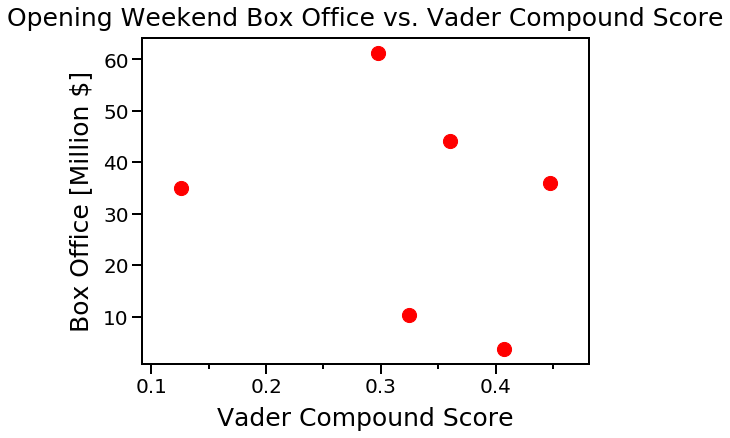

In [41]:
# plotting, set some defaults
from matplotlib import rcParams
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 2
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 2
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 2
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 2

rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['legend.fontsize'] = 20
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2

xfig = plt.figure(figsize=(8,6))

yy = movie_df['opening_weekend_gross'] / 1.0e6
xx = movie_df['CompoundScore']
plt.scatter(xx,yy,marker='o',color='r',s=200)
plt.xlabel('Vader Compound Score',labelpad=10,fontsize=25)
plt.ylabel('Box Office [Million $]',labelpad=10,fontsize=25)
ax = plt.gca()
yformatter = plt.FormatStrFormatter("%.0f")
ax.yaxis.set_major_formatter(yformatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.05))
#ax.xaxis.set_major_locator(plt.MultipleLocator(20))
plt.title('Opening Weekend Box Office vs. Vader Compound Score',fontsize=25,y=1.02)
plt.savefig('../plots/box_office_vs_vaderSentiment.png',dpi=200)